In [296]:
import joblib
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
shap.initjs()


In [2]:
xgboost = joblib.load("../Model/xgboost.joblib")
X_train = joblib.load("../Model/X_train_shap.joblib")

# Create TreeExplainer and get shap values

In [3]:
explainer = shap.TreeExplainer(xgboost, data=X_train)

For trained set

In [4]:
shap_values_train = explainer.shap_values(X_train)

 99%|===================| 39498/39720 [01:20<00:00]        

# Shap value analysis for train samples

## The top 30 features of high importance

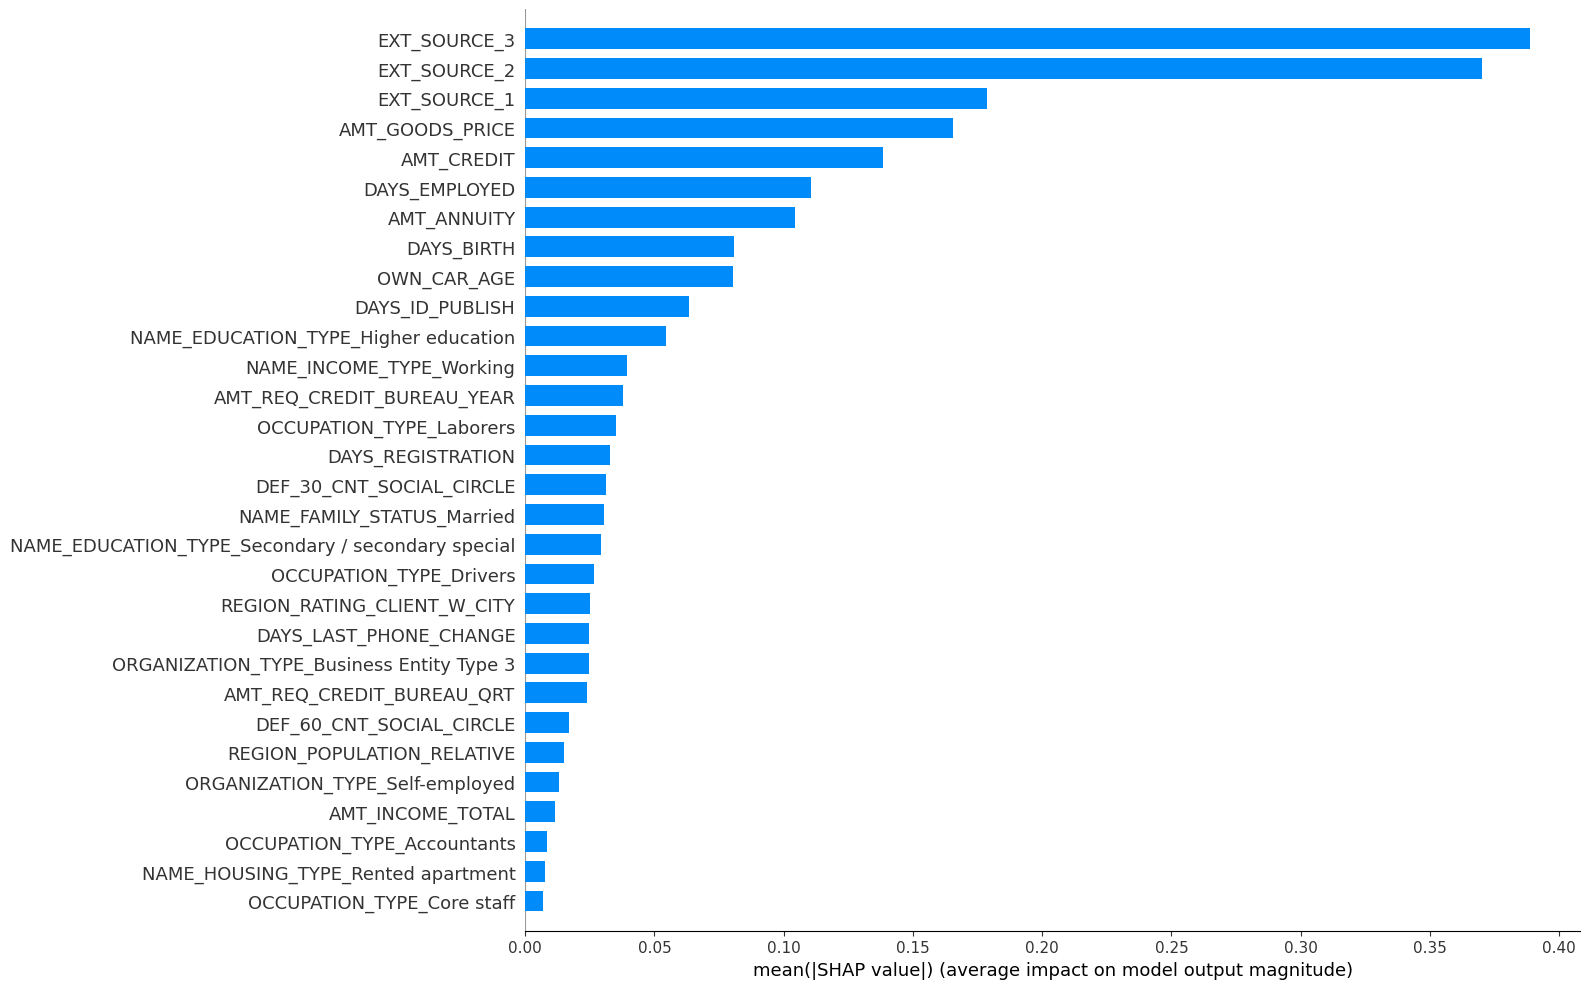

In [6]:
shap.summary_plot(shap_values_train, X_train, plot_type='bar', plot_size=[16,10], max_display=30)

## Top 30 features - to find whether higher value of feature x corresponds to class 0/1

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


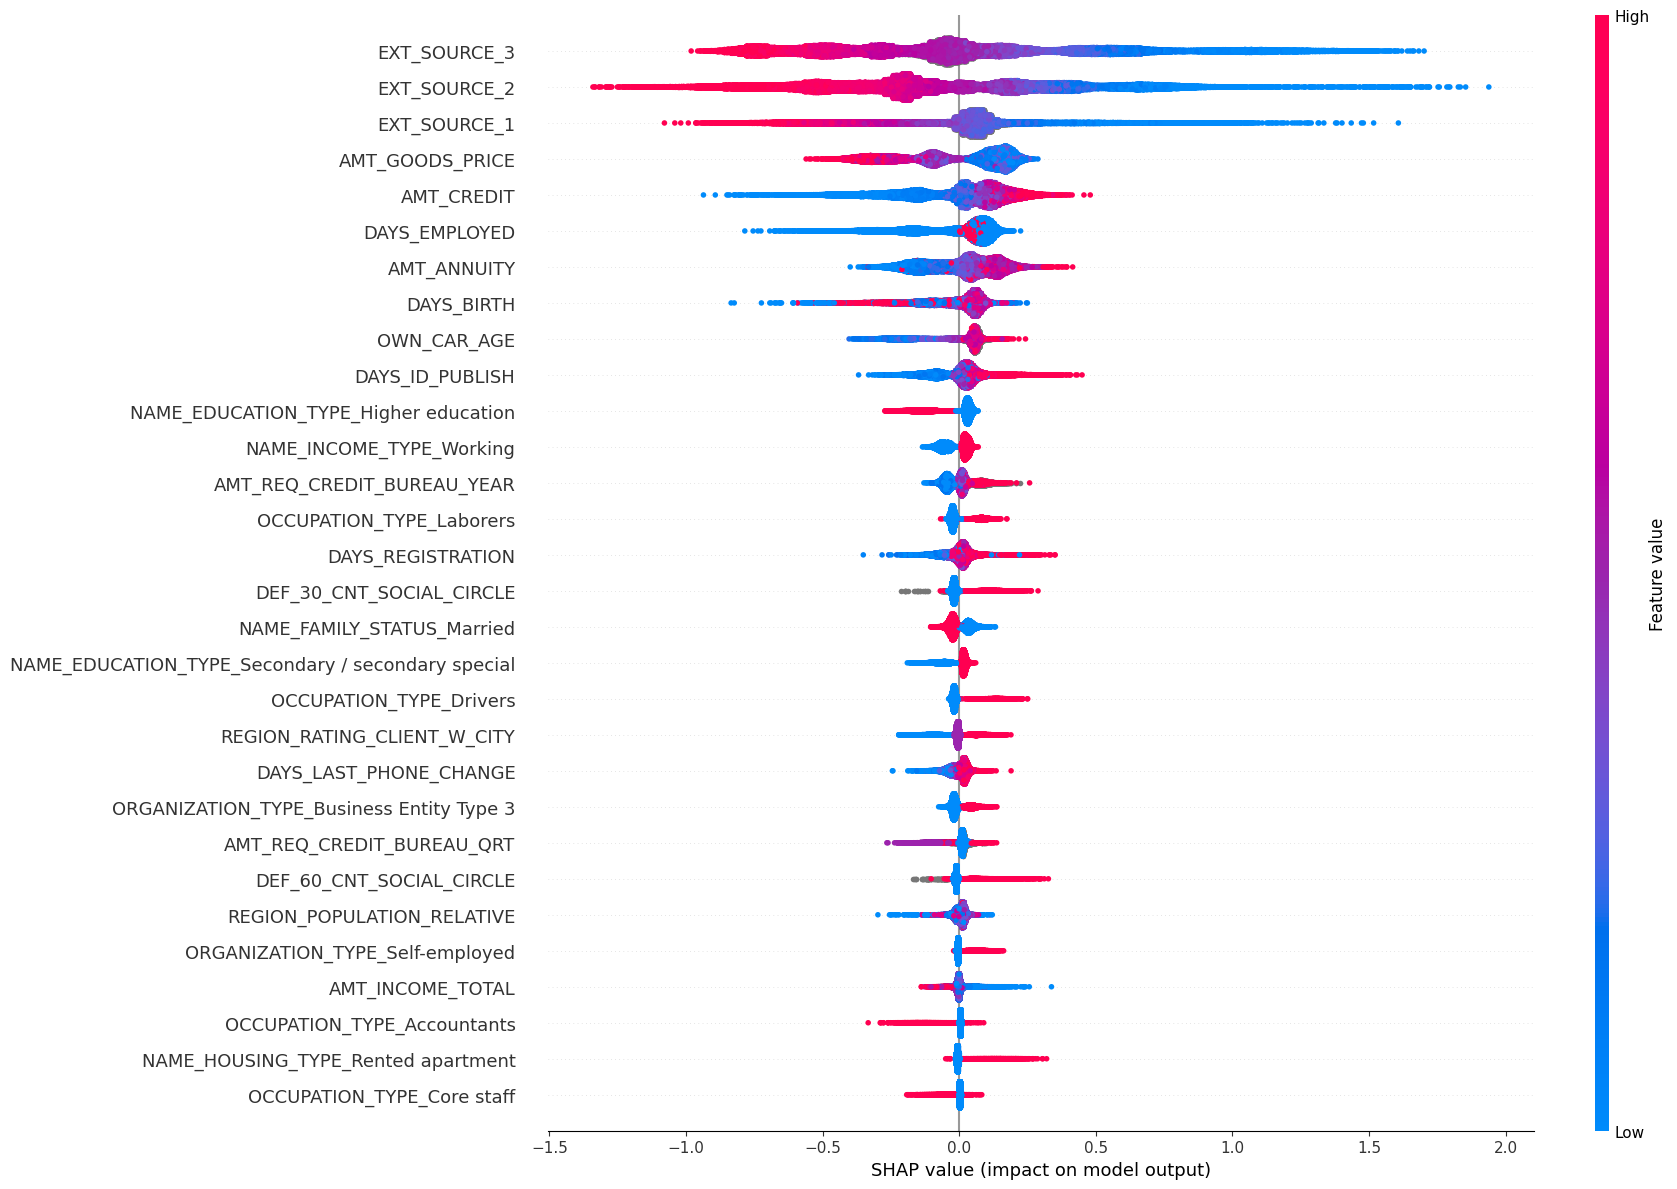

In [7]:
shap.summary_plot(shap_values_train, X_train, plot_size=[18,12], max_display=30)

Small analysis on the graph

Features which affect for class 0 (non-defaulter):
- Higher value of EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1
- ? Higher value of AMT_GOODS_PRICE -> principal amount borrowed
- ? lower value of AMT_CREDIT -> maximum amount upto $xxx which can be borrowed
- ? higher value of CODE_GENDER -> Female 
- ? lower value of DAYS_EMPLOYED
- lower value of AMT_ANNUITY -> the amount whihc borrower repays with interest in regular fixed installments over a specified period of time
- higher value of Higher_education
- higher value of FLAG_OWN_CAR
- lower value of OWN_CAR_AGE 



## Create DF to get the feature, importance score and Direction on class 0/1

In [8]:
feature_names = list(X_train.columns) 

importance_scores = abs(shap_values_train).mean(axis=0)

feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importance_scores})

feature_importance_df["Direction"] = feature_importance_df.apply(lambda row: "Higher values lead to class 1 (Defaulters)"
                                                                if shap_values_train[0][row.name] > 0
                                                                else "Higher values lead to class 0 (Non-Defaulters)"
                                                                if shap_values_train[0][row.name] < 0
                                                                else "No impact on scores", axis=1)

sorted_feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

sorted_feature_importance_df.head(5)

,Feature,Importance,Direction
16,EXT_SOURCE_3,0.388627,Higher values lead to class 1 (Defaulters)
15,EXT_SOURCE_2,0.370292,Higher values lead to class 1 (Defaulters)
14,EXT_SOURCE_1,0.178722,Higher values lead to class 1 (Defaulters)
4,AMT_GOODS_PRICE,0.165548,Higher values lead to class 0 (Non-Defaulters)
2,AMT_CREDIT,0.138518,Higher values lead to class 1 (Defaulters)


In [9]:
# import joblib
# features_set = joblib.load("../../test/credit_streamlit/credit-features.joblib")

# FEATURES = []
# for f_set in features_set.values():
#     FEATURES.extend(f_set)

In [337]:
# shap_xgboost = pd.DataFrame(columns=["feature_type","feature","feature_category_if_exists","importance_score","class"])

# for idx, row in sorted_feature_importance_df.iterrows():
#     if row.Feature in FEATURES:
#         type = "num"
#     else:
#         type = "cat"

#     if type == "cat":
#         f = "_".join(row.Feature.split("_")[:-1])
#         cat_type = row.Feature.split("_")[-1]
#     else:
#         f = row.Feature
#         cat_type = None

#     new_row = {
#         "feature_type": type,
#         "feature": f,
#         "feature_category_if_exists": cat_type,
#         "importance_score": row.Importance
#     }
#     shap_xgboost = shap_xgboost.append(new_row, ignore_index=True)

#shap_xgboost.to_csv("shap_xgboost.csv", index=False)

# Shap value analysis for test samples

A SHAP expected value of 0 for XGBoost credit defaulter classification model signifies that the model is performing consistently, and its predictions, on average, match the expected outcome

In [48]:
explainer = shap.TreeExplainer(xgboost)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

Explainer expected value: [0.]


In [69]:
X_test = joblib.load("../Model/xtest.joblib")
y_test = joblib.load("../Model/ytest.joblib")

In [212]:
X_test.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_XNA,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE,CODE_GENDER,DAY_WEEK_SIN,DAY_WEEK_COS,HOUR_APPR_PROCESS_START,HOUR_APPR_PROCESS_START_sin,HOUR_APPR_PROCESS_START_cos
0,-0.593782,-0.039619,0.248216,3.221369,0.457461,0.667536,0.028129,-0.431485,1.223160,-1.024806,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.593782,-0.092694,-0.332317,-0.364045,-0.178853,0.667536,-0.396960,-0.421423,1.204522,1.379725,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.593782,-0.130605,-0.780156,-0.310389,-0.841138,-1.169155,-0.360861,-0.413008,-1.613622,1.493600,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.593782,-0.149561,-0.524437,-1.107989,-0.581418,0.828885,-1.701385,2.352181,-2.122967,-1.150529,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.593782,0.021039,0.529716,0.001014,0.457461,-0.105966,-0.349523,-0.417953,-0.427771,1.876692,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
X_test.shape, y_test.shape

((9930, 143), (9930, 1))

In [219]:
y_test = y_test.reset_index(drop=True)
y_test.head()

,TARGET
0,0
1,0
2,0
3,0
4,1


Select first 10 users from test sample

In [220]:
select = list(range(10))
features = X_test.iloc[select]

SHAP interaction values help understand how the combinations of features influence the model's output.

In [86]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features) # test
    shap_interaction_values = explainer.shap_interaction_values(features)
    
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

In [87]:
shap_interaction_values.shape

(10, 143, 143)

In [221]:
y_pred = xgboost.predict(features)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

## 10 samples of user

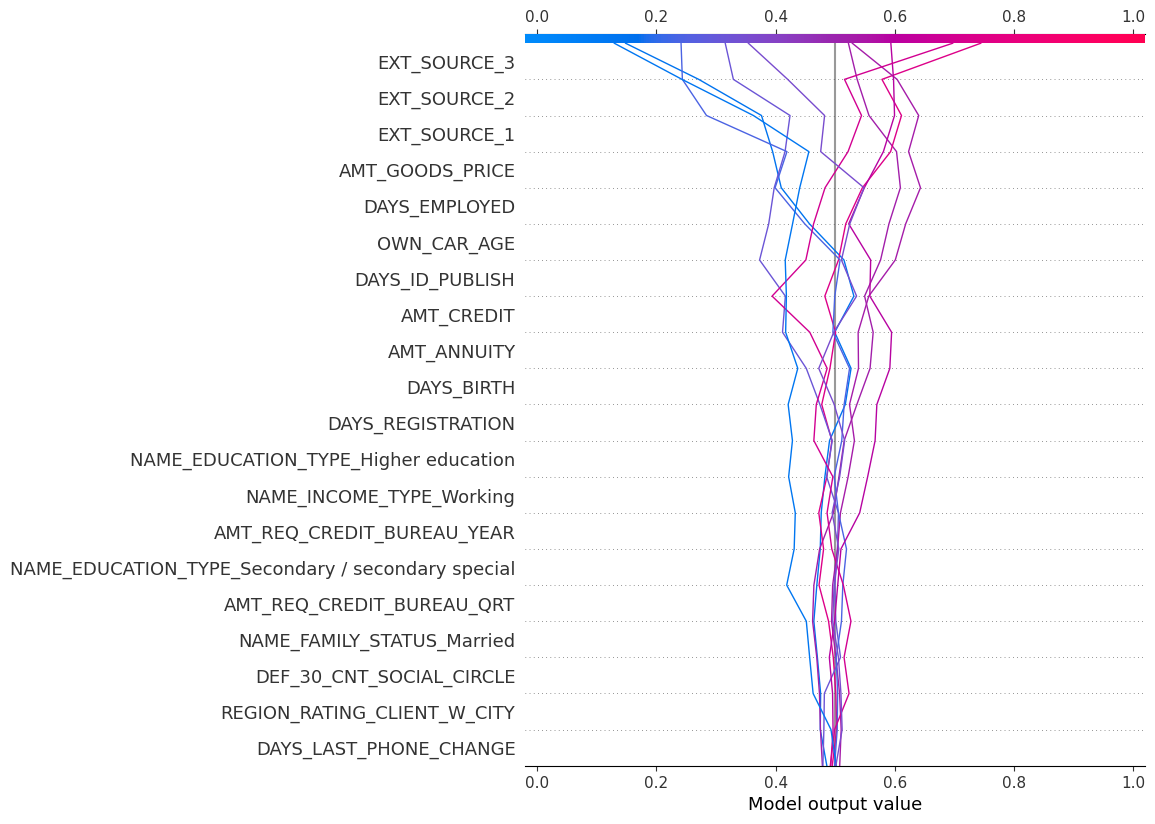

In [89]:
shap.decision_plot(expected_value, shap_values, X_test, link = 'logit')

## Analyse well-classified and misclassified samples

Find the misclassified samples

In [229]:
y_pred = (shap_values.sum(1) + expected_value) > 0 # xgboost prediction
misclassified = y_pred != list(y_test.iloc[select].TARGET)

In [256]:
mc_idx = list(features[misclassified].index)
mc_idx

[1, 2, 6, 9]

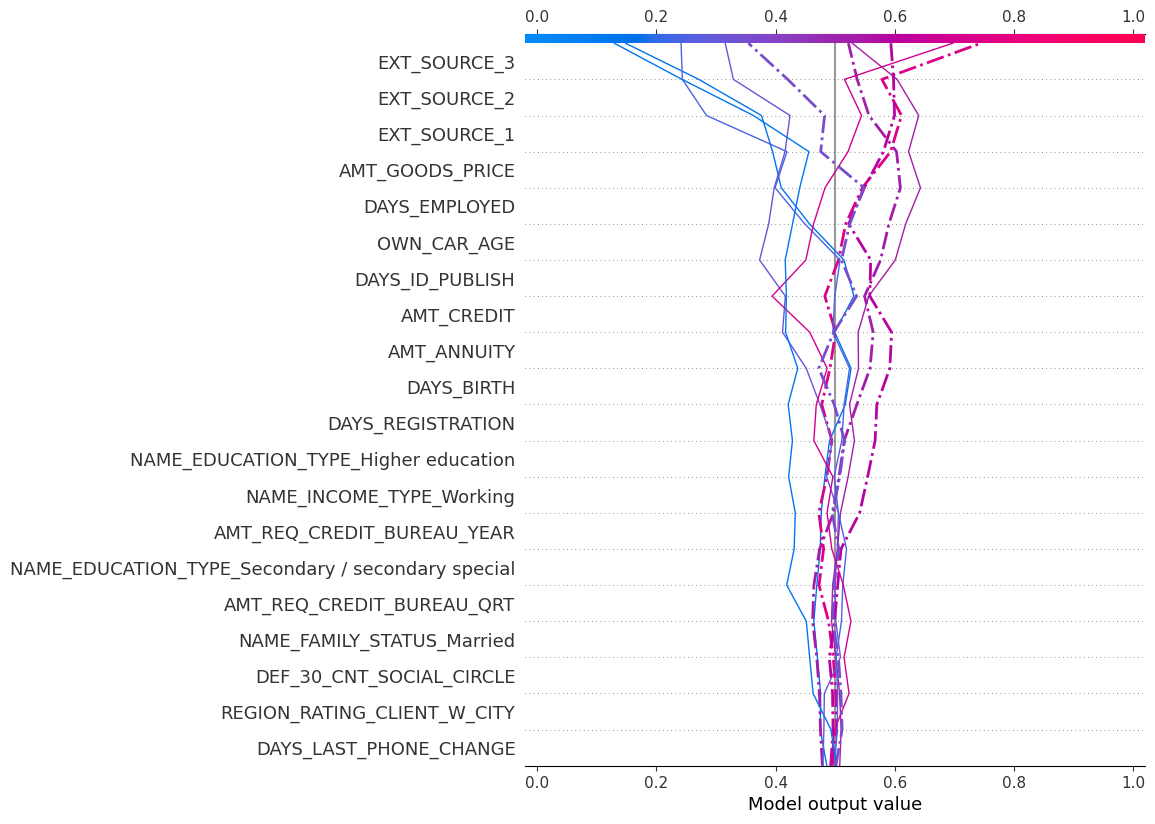

In [108]:
shap.decision_plot(expected_value, shap_values, features, link='logit', highlight=misclassified)

# Force plot

- Red Bars: The red bars in the force plot represent features that push the prediction towards a higher value or a positive outcome. Features with positive SHAP values contribute positively to the model's prediction, leading to an increase in the predicted value compared to the baseline or expected value.

- Blue Bars: Conversely, the blue bars in the force plot represent features that push the prediction towards a lower value or a negative outcome. Features with negative SHAP values contribute negatively to the model's prediction, leading to a decrease in the predicted value compared to the baseline.

## Misclassified Samples

index 1

In [255]:
shap.force_plot(expected_value, shap_values[1], pd.DataFrame(round(features.iloc[1,:], 2)).T, link='logit')

## Well-classified samples

index 0

In [261]:
shap.force_plot(expected_value, shap_values[0], pd.DataFrame(round(features.iloc[0,:], 2)).T, link='logit')

# Decision Plot

## Plot for one value

In [224]:
index = 1
misclassified_single_sample = pd.DataFrame(round(features[misclassified].iloc[index,:], 2)).T
xgboost.predict(misclassified_single_sample)

array([1])

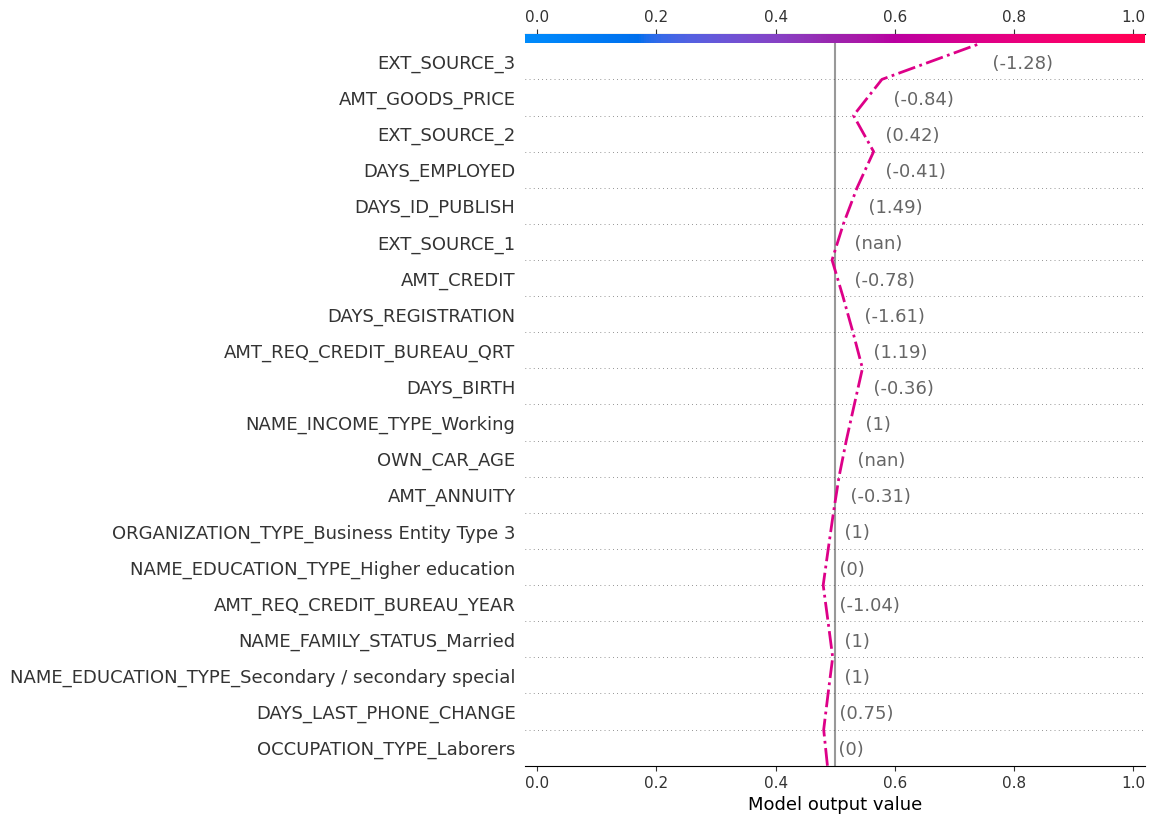

In [225]:
shap.decision_plot(expected_value, shap_values[misclassified][1], misclassified_single_sample,
                   link='logit', highlight=0)

## For each user - Data influence on prediction

In [223]:
y_true = list(y_test.iloc[select].TARGET)
y_true

[0, 0, 0, 0, 1, 0, 0, 1, 0, 1]

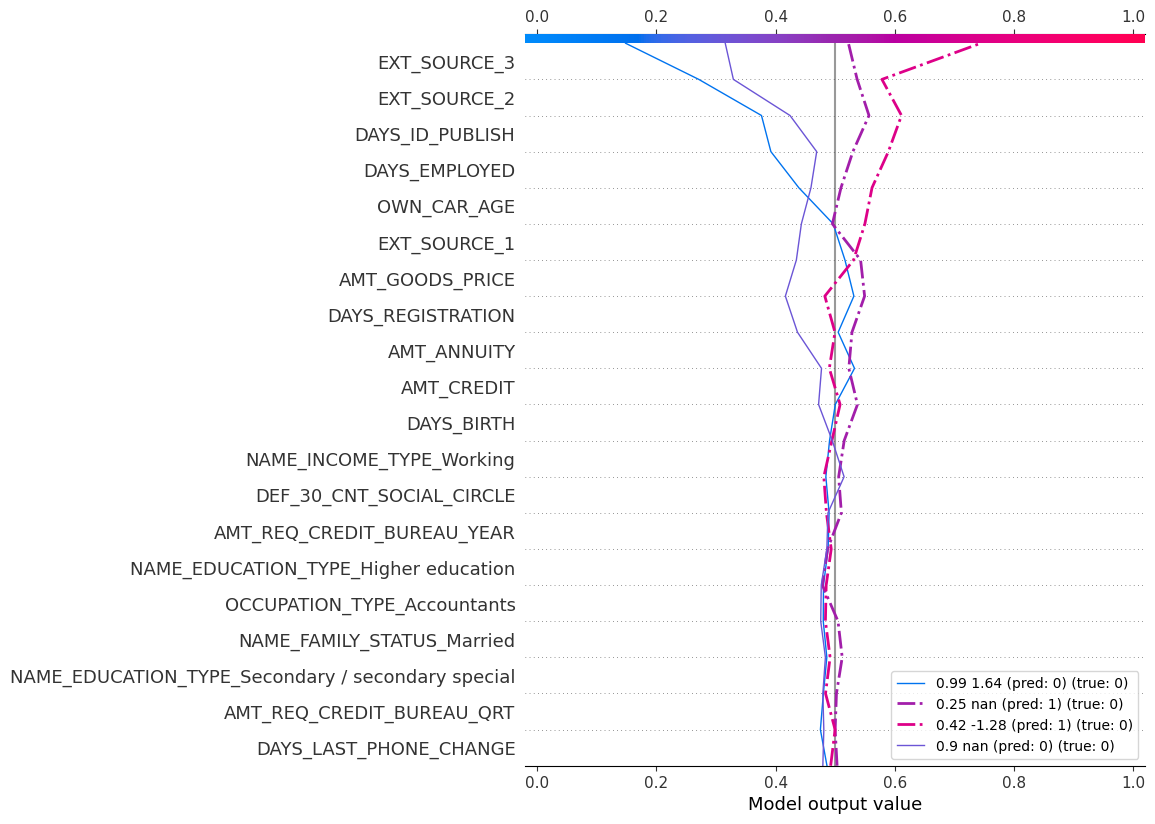

In [263]:
def legend_labels(idx):
    return [f'{round(features.iloc[i]["EXT_SOURCE_2"], 2)} {round(features.iloc[i]["EXT_SOURCE_3"], 2)} (pred: {y_pred[i]:.0f}) (true: {y_true[i]})' for i in idx]

show_idx = [0, 1, 2 , 3]
shap.decision_plot(expected_value, shap_values[show_idx], features, #feature_order=list(sorted_feature_importance_df.index)[::-1],
                   link='logit', legend_labels=legend_labels(show_idx), legend_location='lower right', highlight=misclassified[show_idx])

# Interpreting SHAP values

In [336]:
# shap_df = pd.DataFrame(shap_values, columns = X_test.columns)
# shap_df.head(2)

In [335]:
# baseline = 0.5

# plt.figure(figsize=(6,10))
# for i in range(3):
#     x = shap_df[sorted_feature_importance_df.Feature].iloc[i].values
#     y = sorted_feature_importance_df["Importance"]
#     plt.scatter(baseline-x, y, marker='o')
#     plt.plot(baseline-x, y, alpha=0.5)
    
# plt.axvline(x=baseline, linestyle='--', c='black', alpha=0.5)
# plt.yticks(np.arange(min(y), max(y)+1, 0.05))
# plt.ylim(0, 0.5)
# plt.xlim(0, 1)
# plt.show()